<a href="https://colab.research.google.com/github/jkhan-prog/BasicPython/blob/main/Axis_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: 

* Explore the dataset and extract actionable insights from customer data
* Perform univariate and multivariate analysis.
* Building customer profiles (characteristics of a customer) for the different insurance needs.
* Generate set recommendations that will help the company in targeting new customers.

# Context:
 Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.


# Data:
**AxisInsurnace.csv** - it contains following information 

Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

Sex - This is the policy holder's gender, either male or female.

BMI - This is the body mass index (BMI), which provides a sense of how over or under-weight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.

Children - This is an integer indicating the number of children / dependents covered by the insurance plan.

Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.

Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.

Charges​ - Individual medical costs billed to health insurance













### Import the necessary packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Read the dataset

In [3]:
data=pd.read_csv("AxisInsurance.csv")

In [5]:
# copying data to another variable to avoid any changes to original data
AxisIns=data.copy()

### View the first and last 5 rows of the dataset.

In [6]:
AxisIns.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
AxisIns.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Understand the shape of the dataset.

In [8]:
AxisIns.shape

(1338, 7)

* Dataset has 180 rows and 9 columns.

### Check the data types of the columns for the dataset.

In [9]:
AxisIns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Fixing the data types
* sex, smoker and region are of object type. They should be changed to categories.

`coverting "objects" to "category" reduces the data space required to store the dataframe`

In [10]:
AxisIns["sex"]=AxisIns["sex"].astype("category")
AxisIns["smoker"]=AxisIns["smoker"].astype("category")
AxisIns["region"]=AxisIns["region"].astype("category")

In [12]:
AxisIns.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


* sex, smoker and region have been converted to categories
* No missing values in any columns




`we can see that the memory usage has decreased from 73KB to 46KB`

### Give a statistical summary for the dataset.

In [13]:
AxisIns.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* Mean of Charges is greater than the median, this suggests that it is right skewed.
* Age, bmi, children has approximately the same mean and median.


In [14]:
AxisIns.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


* There is an even distribution between males and females in the sample.
* There are ~80% non-smokers in the sample
* There are 4 unique regions, with majority from soutwest regions


### Check for missing values

In [15]:
AxisIns.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* There are no missing values in the data.

### EDA

### Univariate analysis

In [16]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

## Observations on Age

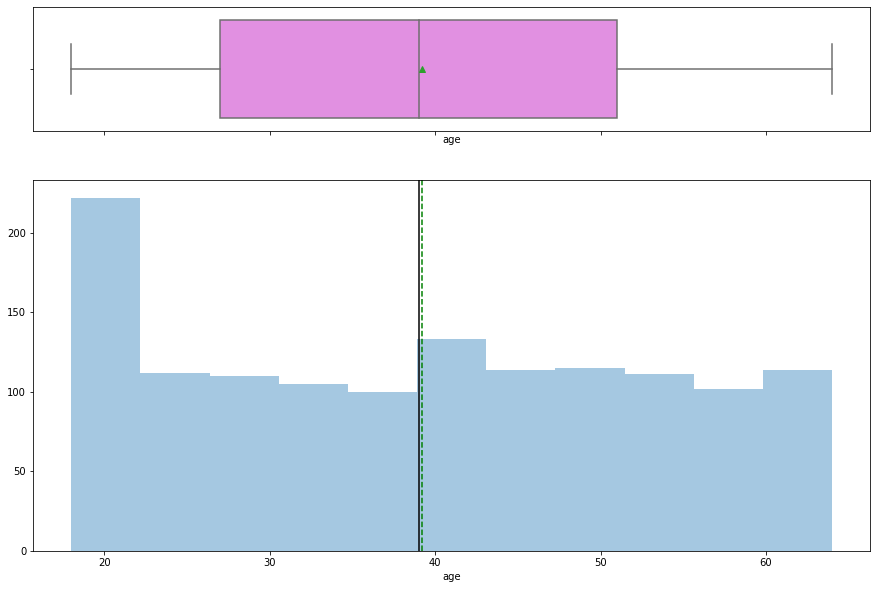

In [18]:
histogram_boxplot(AxisIns["age"])

* The distribution of Age is not skewed.


## Observations on BMI

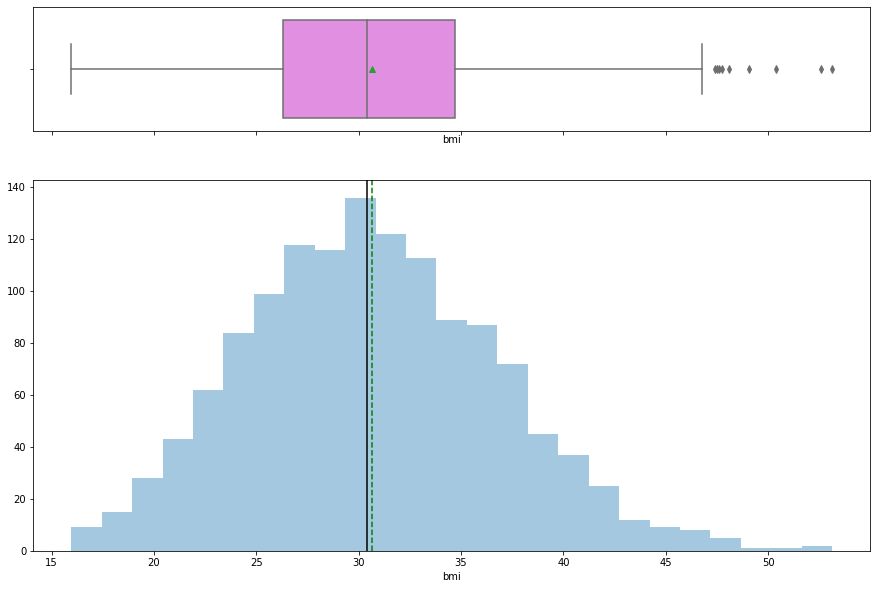

In [20]:
histogram_boxplot(AxisIns["bmi"])  

* Mean and median BMI for customers is around 31
* There are a few outliers present in data (with customers in BMI>46)

## Observations on Children

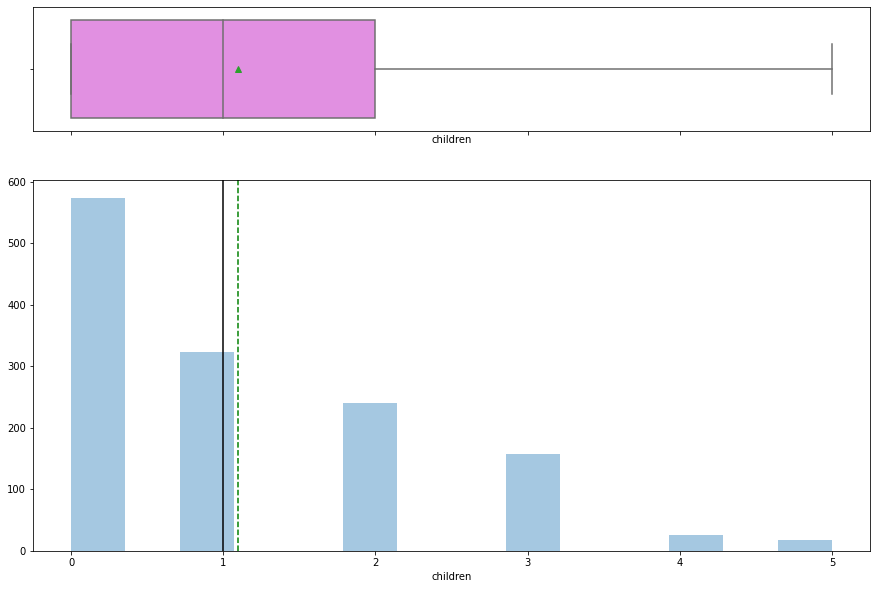

In [21]:
histogram_boxplot(AxisIns["children"])

* Number of children is left skewed with most customers with 0 or 1 child 


## Observations on Charges

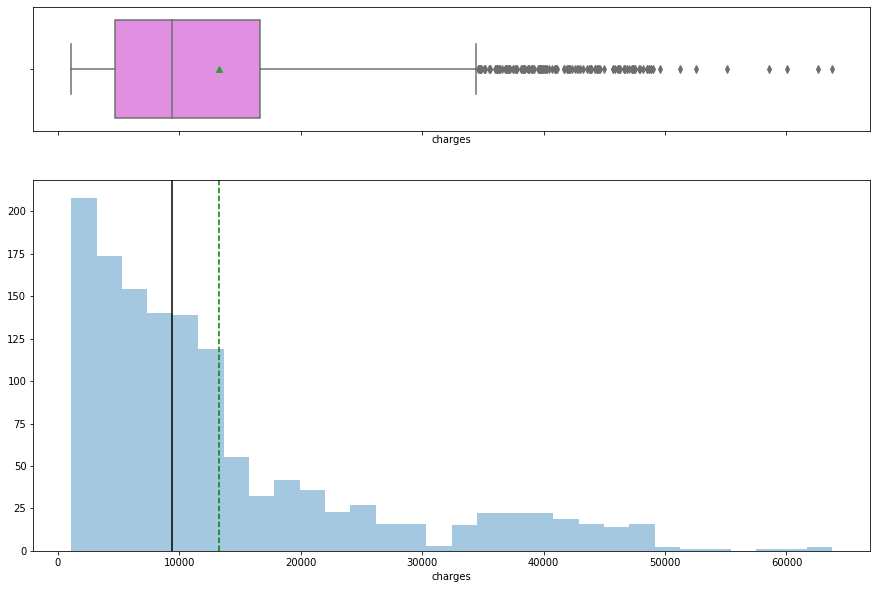

In [22]:
histogram_boxplot(AxisIns["charges"])

* Claim charges are left skewed, with most claims under $10K

* There are significant amount of ouliers with claiims over $35K




In [24]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

## Observations on Gender

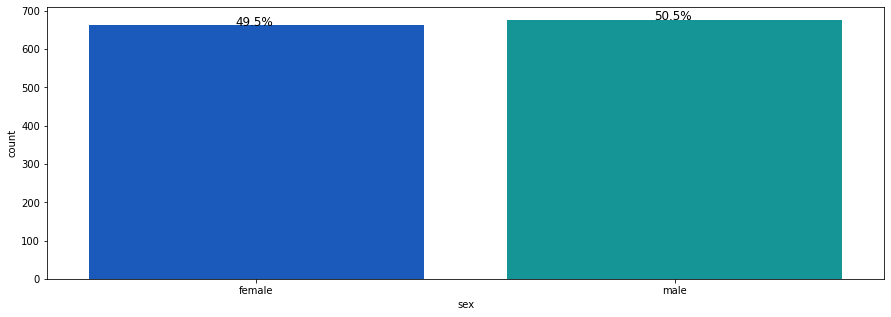

In [25]:
plt.figure(figsize=(15,5))
ax = sns.countplot(AxisIns["sex"],palette='winter')
perc_on_bar(ax,AxisIns["sex"])

* Equal proportion of gender

## Observations on smoker

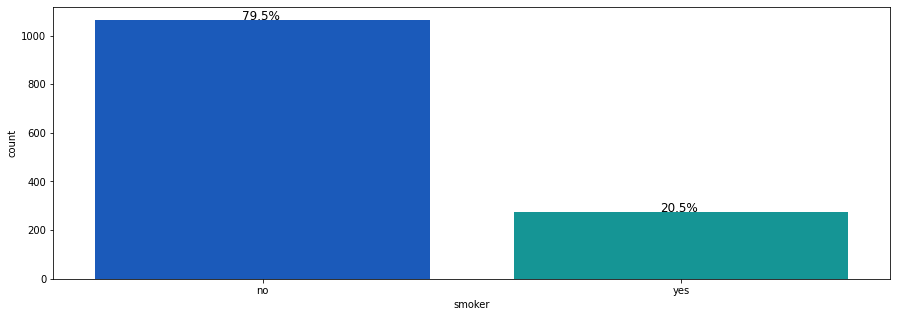

In [26]:
plt.figure(figsize=(15,5))
ax = sns.countplot(AxisIns["smoker"],palette='winter')
perc_on_bar(ax,AxisIns["smoker"])

* There are more non-smoker customers(79.5%) than smokers(20.5%)

## Observations on Region


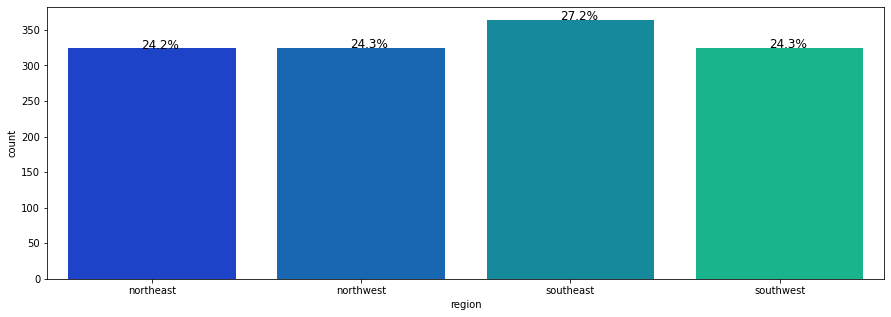

In [27]:
plt.figure(figsize=(15,5))
ax = sns.countplot(AxisIns["region"],palette='winter')
perc_on_bar(ax,AxisIns["region"])

*  regions are equally distributed in the dataset, with southeast slightly higher

## Bivariate Analysis

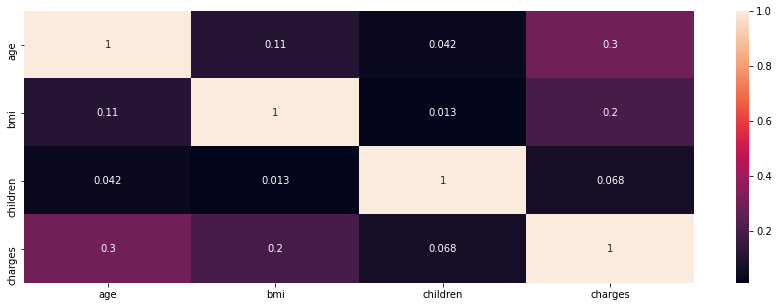

In [28]:
plt.figure(figsize=(15,5))
sns.heatmap(AxisIns.corr(),annot=True)
plt.show()

* There is low correlation between all categories

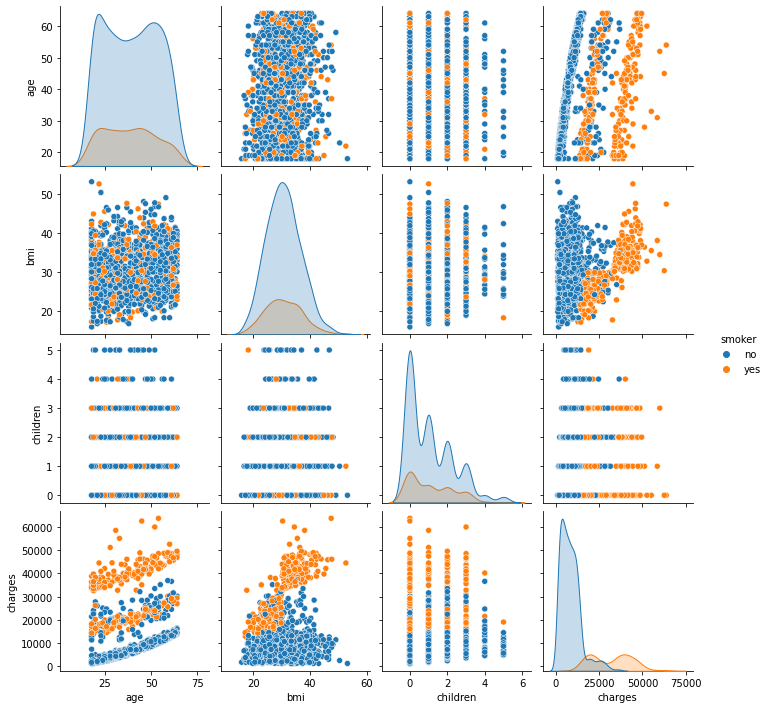

In [35]:
sns.pairplot(data=AxisIns,hue="smoker")
plt.show()

* We can see varying distributions in variables for different products, we should investigate it further.

### Product vs Age

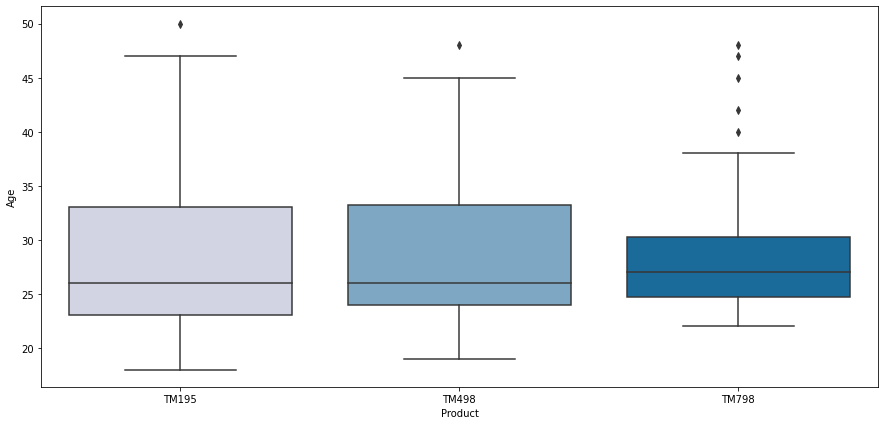

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Product"],AxisIns["Age"],palette="PuBu")
plt.show()

* TM195 and TM498 are preferred by customers of all ages but for TM798 customers are in the range of above 22 and below 38 (but there are some outliers)

## Product vs Education

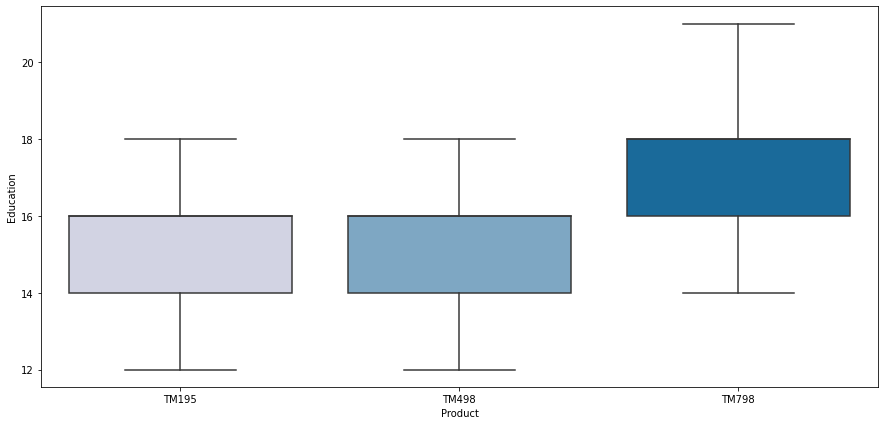

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Product"],AxisIns["Education"],palette="PuBu")
plt.show()

* Customers buying TM798 have higher education as compared to the customers buying the other two other products

## Product vs Usage

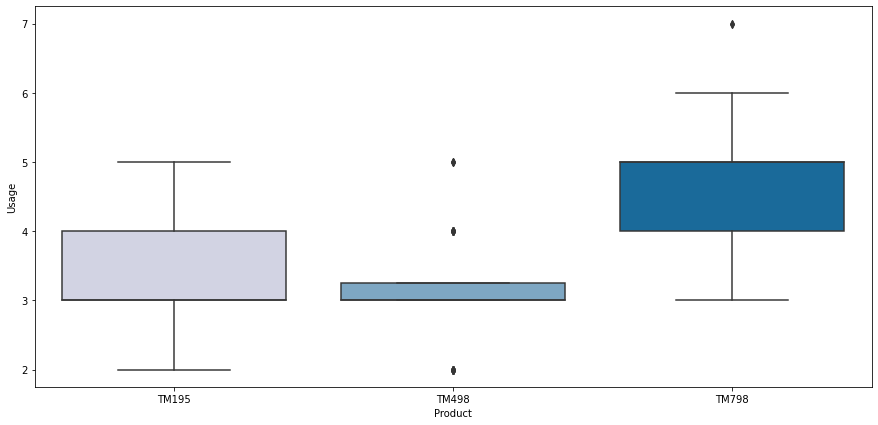

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Product"],AxisIns["Usage"],palette="PuBu")
plt.show()

* Customers who have higher expected treadmill usage(greater than 3 days) prefer the TM798 product, Customers with very light(2-3 days) usage prefer TM498, customers who have moderate usage (greater than 2 days but less than or equal to 5 days) prefer TM195.

## Product vs Income

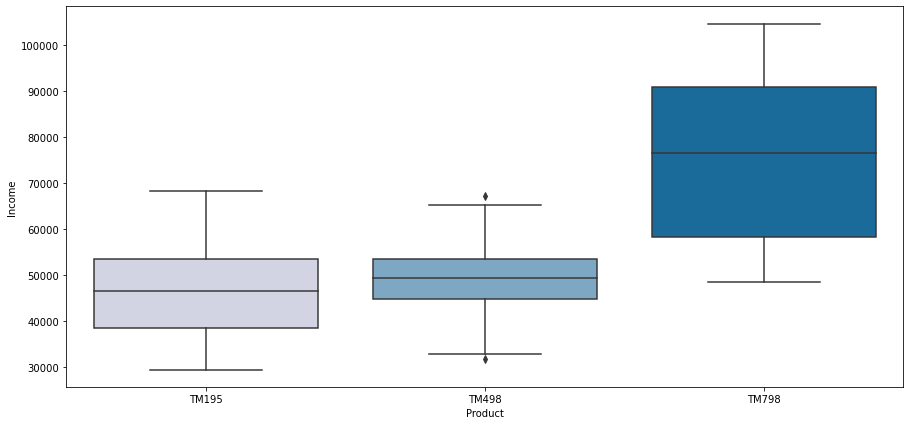

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Product"],AxisIns["Income"],palette="PuBu")
plt.show()

* Customers with higher income prefer TM798, whereas TM195 and TM498 are prefered by middle income customers.

## Product vs Miles

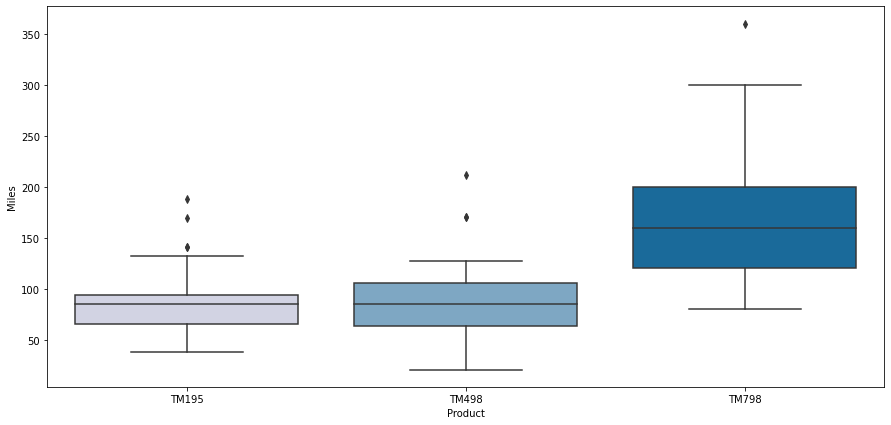

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Product"],AxisIns["Miles"],palette="PuBu")
plt.show()

* Customers who expect to run higher miles go for TM798.

## Product vs Gender

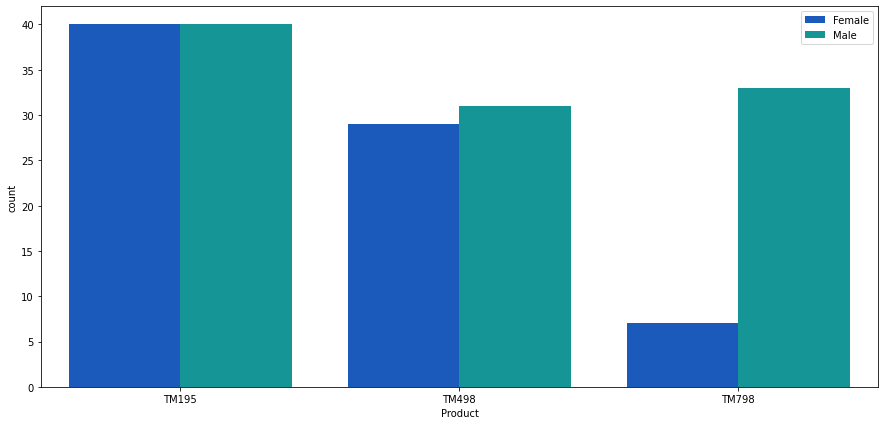

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(AxisIns["Product"],hue=AxisIns["Gender"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* TM798 has been bought more by the male customers as compared to the female customers, for TM195 and TM498 there is equal distribution among genders

## Product vs Marital Status

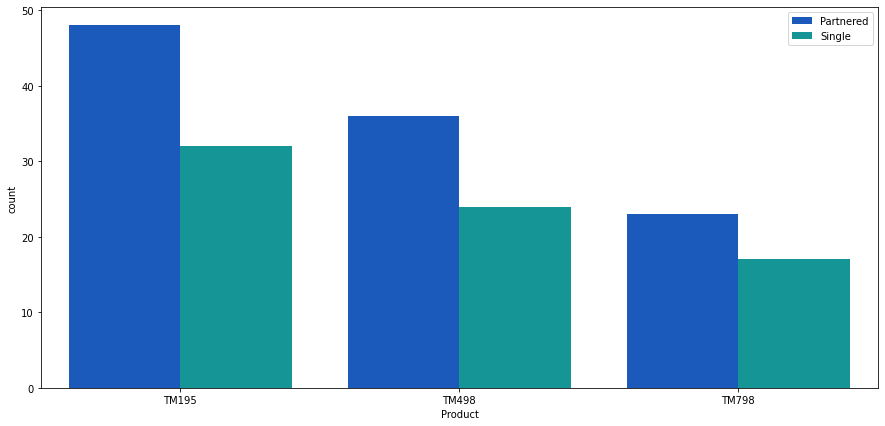

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(AxisIns["Product"],hue=AxisIns["MaritalStatus"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* All the products are couple/partner friendly.
* Couples/partnered customers have a higher chance of buying a product when compared to single customers.

## Product vs Fitness

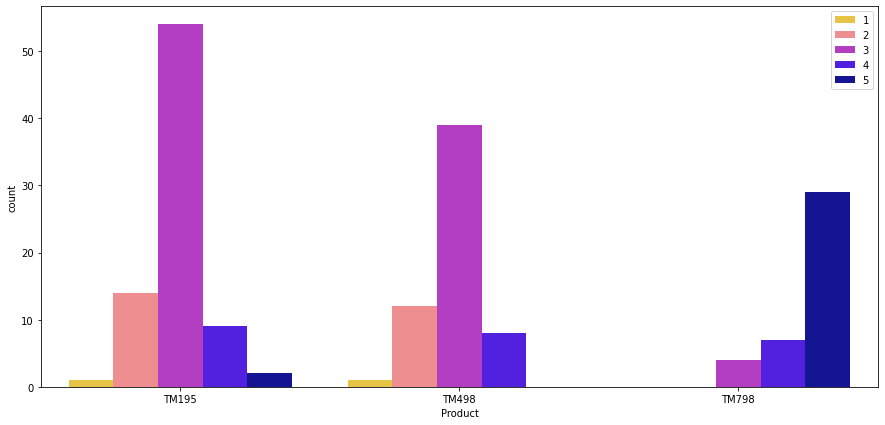

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(AxisIns["Product"],hue=AxisIns["Fitness"],palette="gnuplot2_r")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers who purchased  TM195 and TM498 gave themselves a balanced fitness rating of 3  (on a scale of 5, 1 being the least fit and 5 being the most fit), but for TM798 most of customers have rated themselves higher in fitness that is 5.

### Grouping data w.r.t to products to build customer profiles

In [ ]:
AxisIns[AxisIns["Product"]=="TM195"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.0,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,5.0,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,54.0,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,NaN,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,NaN,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,NaN,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,NaN,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,NaN,53439.00000,94.000000


#### TM195 Customer

The TM195 customer is our regular customer (since this product is sold more than others).
* Early 20’s to early 30’s
* 12-18 years of educataion
* Income between 40K and 50K
* Plans to use treadmill three to four times per week for light usage.
* Has an average fitness level (rated 3)

In [ ]:
AxisIns[AxisIns["Product"]=="TM498"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.0,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,4.0,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,3.0,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,39.0,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,NaN,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,NaN,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,NaN,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,NaN,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,NaN,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,NaN,53439.000000,106.000000


#### TM498 Customer

The TM498 customers is similar to the TM195 customer in most aspects. The differences are that these customers have a slightly higher annual income, a narrower usage, and a broader expectation of Miles to run each week.

With such a specific usage anticipation it is likely the TM498 customer is a working adult with a fixed or busy schedule (since these customers only tend to use the treadmill 3 times a week)

* Adult in their mid 20’s to early 30’s
* 12-18 years of educatation.
* Income around 50K.
* Plans to use treadmill three days a week for a light to moderate amount.
* Has an average fitness level.

In [ ]:
AxisIns[AxisIns["Product"]=="TM798"].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.0,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,3.0,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,5.0,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,29.0,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,NaN,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,NaN,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,NaN,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,NaN,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,NaN,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,NaN,90886.00000,200.000000


#### TM798 Customer

The TM798 model attracts a specific customer. In stark contrast to models T498 and T195, the T798 customer is predominantly male, highly educated and has higher salary.
* Generally preferred by Males in late 20’s
* Highly Educated
* Higher income earner
* Plans to use treadmill 4-5 days a week, running 160 miles on an average.
* Considers themselves very fit.

### Customer Segmentation

This will help us to understand and cater needs of customers better based on their gender,marital status, Age etc.

## Usage vs Gender vs Marital Status

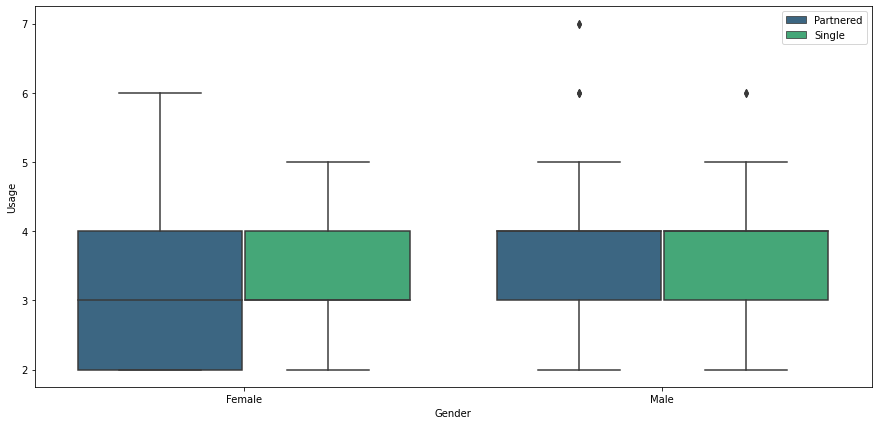

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Usage"],hue=AxisIns["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Usage for single females, single or partnered male is same it varies for females that have a partner.

## Gender vs Income

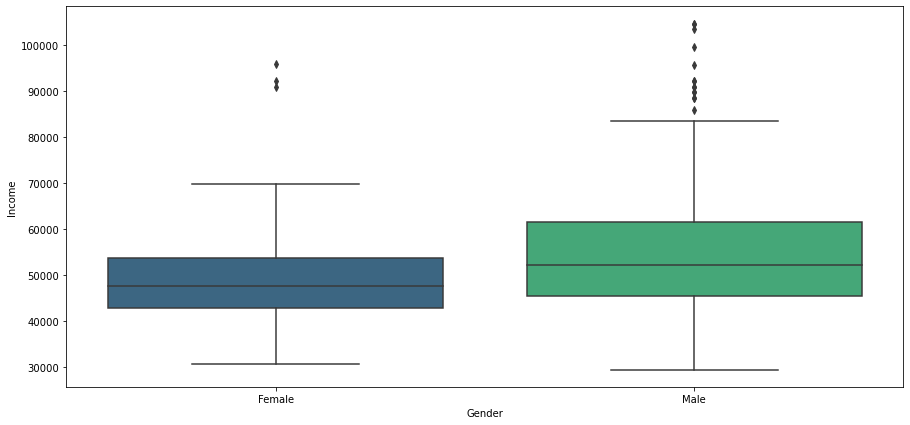

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Income"],palette="viridis")
plt.show()

* There is a large disparity in income of both the genders, there are more males with higher income than females.

## Gender vs Income vs Marital Status

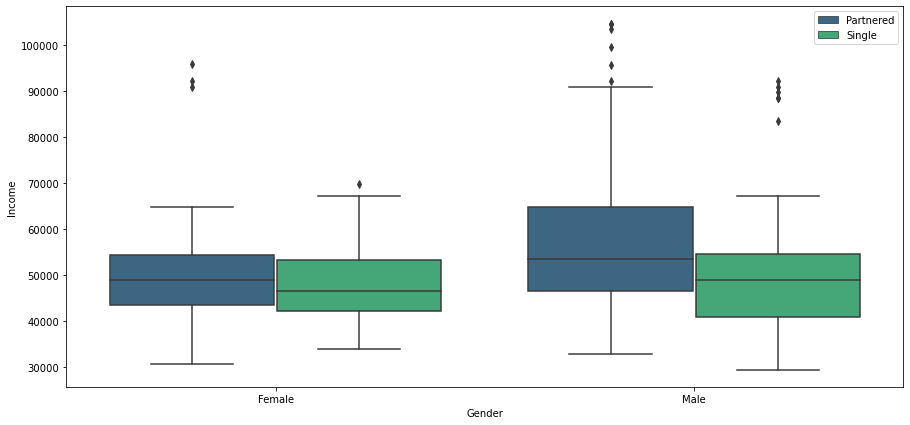

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Income"],hue=AxisIns["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Males with a partner have higher income, while the income for single and partnered females is almost compareable.

## Gender vs Miles

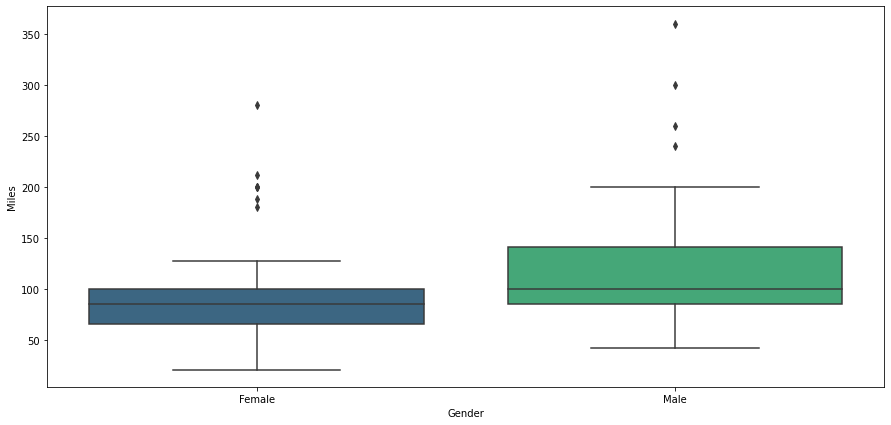

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Miles"],palette="viridis")
plt.show()

* Males expect to run more miles than females

## Gender vs Miles vs Marital Status

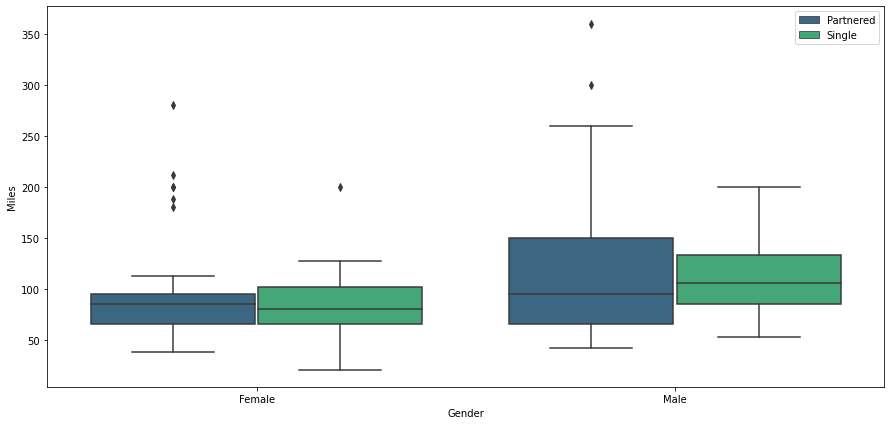

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Miles"],hue=AxisIns["MaritalStatus"],palette="viridis")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Single and Partnered male expect to run more miles, while not much difference can be noticed between Single or Partnered females.

## Gender vs Miles vs Education

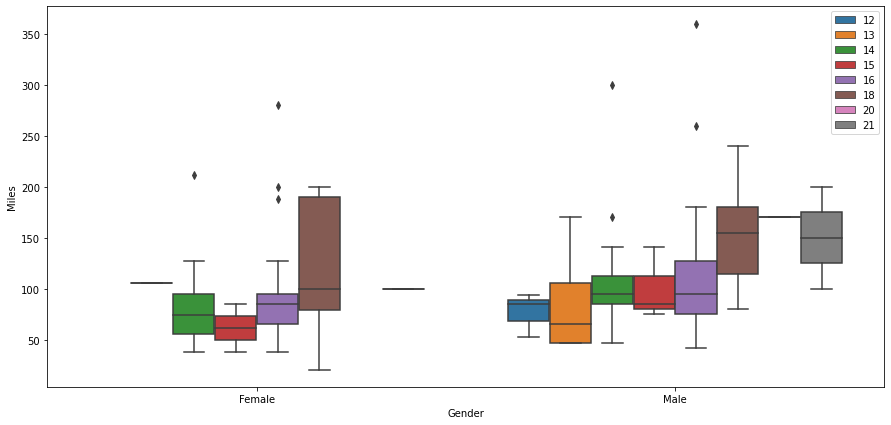

In [ ]:
plt.figure(figsize=(15,7))
sns.boxplot(AxisIns["Gender"],AxisIns["Miles"],hue=AxisIns["Education"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The expected miles to run increases as the education level increases, indicating that the more educated customers are more fitness aware.

## Age vs Miles vs Gender

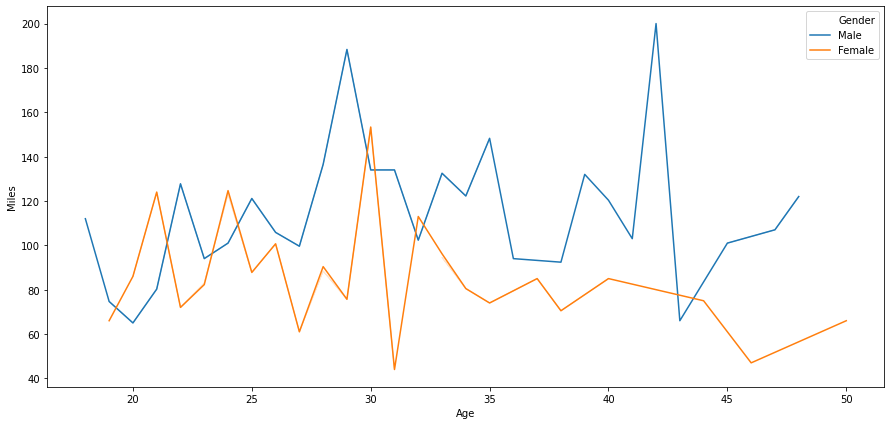

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(AxisIns["Age"],AxisIns["Miles"],hue=AxisIns["Gender"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* With the increase in age the average expected miles to run decreases in females, whereas for males it shows an increasing and decreasing trend.
* As the age increases above 25, males expect to run more miles than females.
* After 30 there is a sharp decrease in the Average miles a female expects to run.

## Age vs Miles vs Marital Status

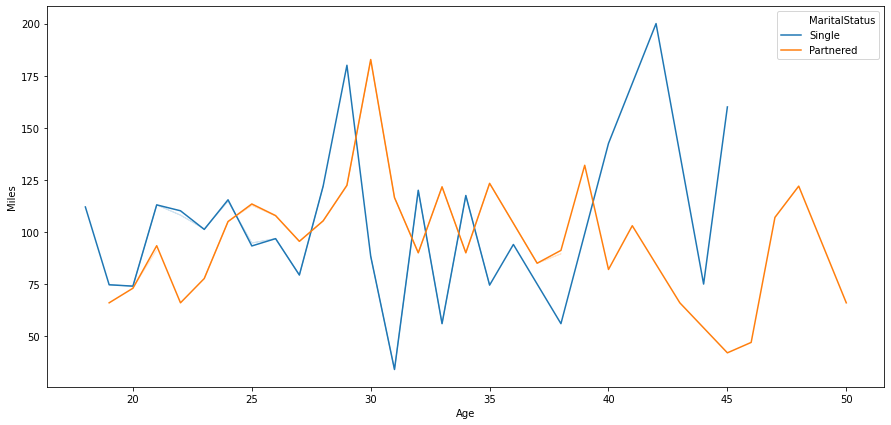

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(AxisIns["Age"],AxisIns["Miles"],hue=AxisIns["MaritalStatus"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* The trend is mostly similar across younger years for a single or a customer with a partner, however after 40 years singles tend to work more on their fitness.

## Age vs Income vs Product

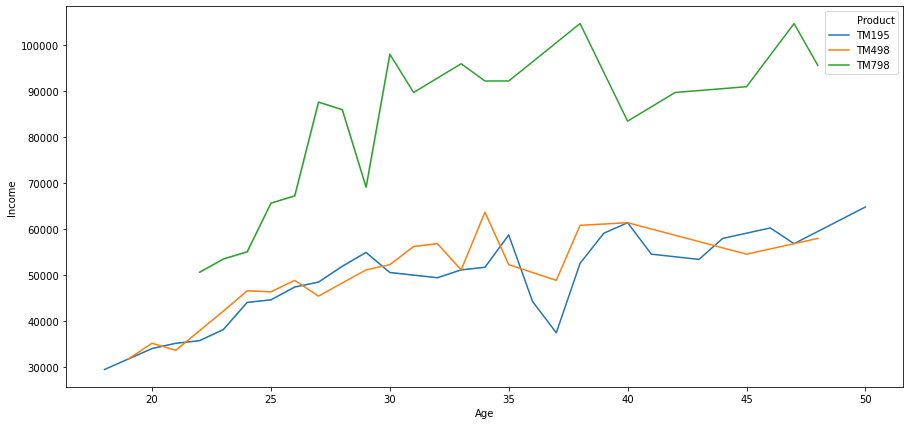

In [ ]:
plt.figure(figsize=(15,7))
sns.lineplot(AxisIns["Age"],AxisIns["Income"],hue=AxisIns["Product"],ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* TM195 and TM498 have simlilar income group customers[30k-60k] for all age groups but TM798 is purchased by higher income [greater than 60k] customers only for all age groups.

## Income vs Miles vs Education

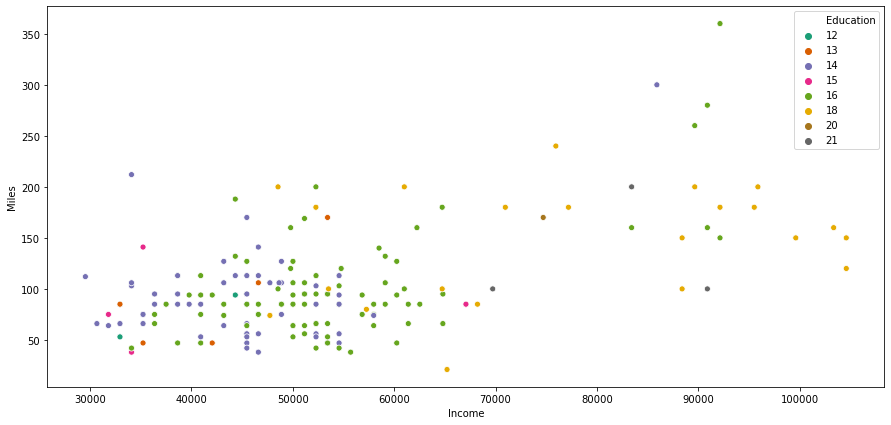

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(AxisIns["Income"],AxisIns["Miles"],hue=AxisIns["Education"],ci=0.,palette="Dark2")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

*  Customers having an income of more than 70k have 18-21 years of education and expect to run 100-200 miles a week.

## Income vs Miles vs Product

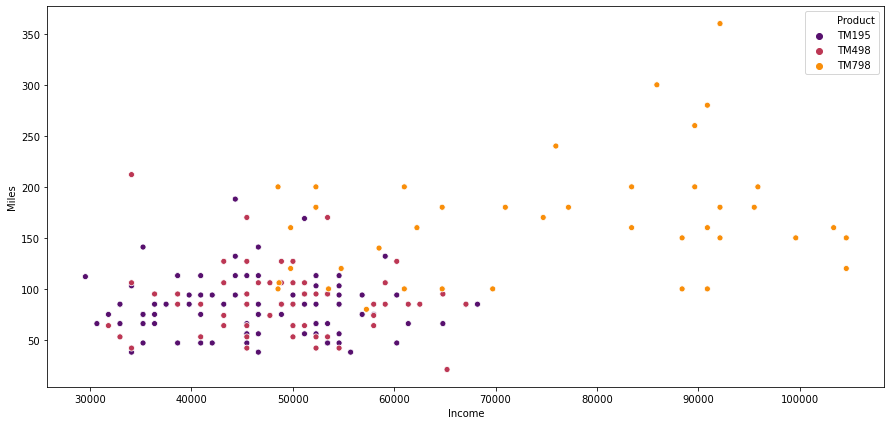

In [ ]:
plt.figure(figsize=(15,7))
sns.scatterplot(AxisIns["Income"],AxisIns["Miles"],hue=AxisIns["Product"],ci=0,palette="inferno")
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* Customers having an income of more than 70k tend to buy TM798 and run more miles.

## Conclusion

### Key insights

#### TM195: 

* An affordable and general-purpose treadmill that can be used for a wide range of users.

* It can be considered as an entry-level product generally targeted for first-time fitness enthusiasts or college-going population. 

* Customers with light to moderate usage 3 to 4 times a week go for this product.


#### TM495: 

* An affordable product like the TM195 with more features and probably has a high price than TM195. 

* The product also generally targets the same age group as the TM195 but has users of slightly higher income.

* The product is used generally 3 times per week.


#### TM798: 

* A top of the range treadmill with plenty of features that excite the fitness enthusiasts. 

* It has a higher price point and probably the flagship product of the company. 

* The buyers of the product are core users that rate themselves very highly on the fitness score as evident from the usage and expected miles to run. 

* The buyers in this segment are more educated, have an income(greater than 60k) more than the other two treadmill users, and take their fitness very seriously. 

* Male customers prefer this product more than females.

### Business Recommendations

* The company has an affordable product in its portfolio that brings in the bulk of the volume of its sales, which is the TM195. The TM798 is their flagship product that brings in the profits for the company. 


* The company needs to engage in more marketing to convey that product TM798 is suitable for both the genders and try to lure the younger age group into buying their flagship product. Currently, it seems TM798 is marketed as an exclusive product for the males making more money as there is a large disparity in income for both genders.


* Years of education are proportionate to income, and so customers with higher education can be recommended an expensive model(TM798).


* Females above 30 years can be recommended the lower end products(TM195 and TM498) since they wish to run a fewer number of miles and therefore the usage of the product won't be higher.


* Partnered Females can be recommended all types of products (low end to high end) since their usage varies from 2 days per week to 6 days per week.


* Singles above 40 years can be recommended the higher end product(TM798) since they wish to run more miles and therefore the usage would be higher.


* Partnered males have a higher income and also expect to run more miles hence the higher end product TM798 would be a good recommendation for them.